# Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
from src.helpers import *
from glob import glob

Had to perform the following to get `librosa.load()` to work properly after encountering `Error 0x7e: cannot load sndfile.dll`
```sh
pip uninstall soundfile
pip install soundfile
```

# Read Pre-Processed Data

In [2]:
folderpath = glob('../../data/extracted/*')
list(enumerate(folderpath))

[(0, '../../data/extracted\\kino'),
 (1, '../../data/extracted\\korean-ost'),
 (2, '../../data/extracted\\lights-and-motion'),
 (3, '../../data/extracted\\m83'),
 (4, '../../data/extracted\\odesza'),
 (5, '../../data/extracted\\README.md'),
 (6, '../../data/extracted\\sleeping-at-last'),
 (7, '../../data/extracted\\synth-pop'),
 (8, '../../data/extracted\\tony-anderson')]

In [3]:
filepaths = glob(glob('../../data/extracted/*')[0] + '/*.pkl*')
filepaths

['../../data/extracted\\kino\\Aram Khachaturian, Kino - Ivan Sings.pkl.pbz2',
 '../../data/extracted\\kino\\Frédéric Chopin, Kino - Prélude in E Minor, Op. 28, No. 4.pkl.pbz2',
 '../../data/extracted\\kino\\Kino - Above the Trees.pkl.pbz2',
 '../../data/extracted\\kino\\Kino - All.pkl.pbz2',
 '../../data/extracted\\kino\\Kino - Anew.pkl.pbz2',
 '../../data/extracted\\kino\\Kino - As a Cloud.pkl.pbz2',
 '../../data/extracted\\kino\\Kino - Away.pkl.pbz2',
 '../../data/extracted\\kino\\Kino - Bloom.pkl.pbz2',
 '../../data/extracted\\kino\\Kino - Charleston.pkl.pbz2',
 '../../data/extracted\\kino\\Kino - Donau.pkl.pbz2',
 '../../data/extracted\\kino\\Kino - Each and Every (Ambient Mix).pkl.pbz2',
 '../../data/extracted\\kino\\Kino - Each and Every (Piano).pkl.pbz2',
 '../../data/extracted\\kino\\Kino - Each and Every.pkl.pbz2',
 '../../data/extracted\\kino\\Kino - Erlöst  Redeemed.pkl.pbz2',
 '../../data/extracted\\kino\\Kino - Gathering.pkl.pbz2',
 '../../data/extracted\\kino\\Kino - God 

In [4]:
# feature_vector, feature_repr = AudioRepository.load_one_processed_audio(filepath)
# audio = feature_vector.audio
audio = AudioDataProcessor.load_one('../../data/raw/kino/Kino - Charleston.mp3')
feature_vector, feature_repr = FeatureVectorProcessor(audio, save_repr=True).process()
print(f'Loaded song: {audio.name}')

Loaded song: Kino - Charleston


# Visualising the Data

## Waveform

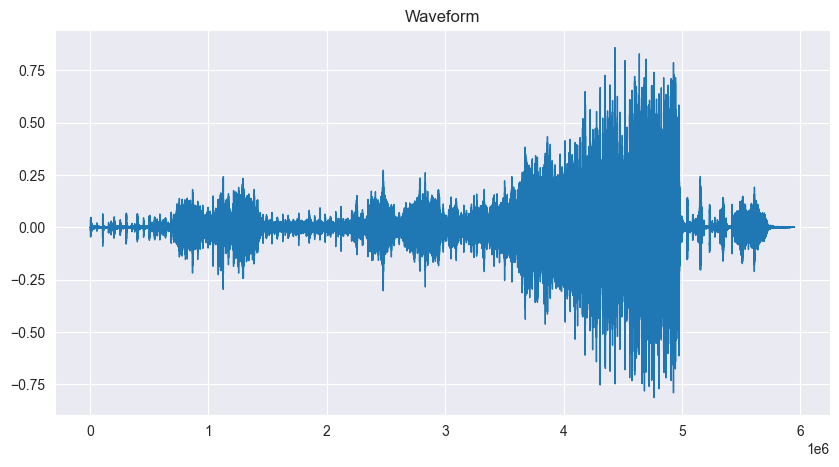

In [5]:
pd.Series(audio.waveform).plot(figsize=(10,5), lw=1, title='Waveform')
plt.show()

## Spectrogram

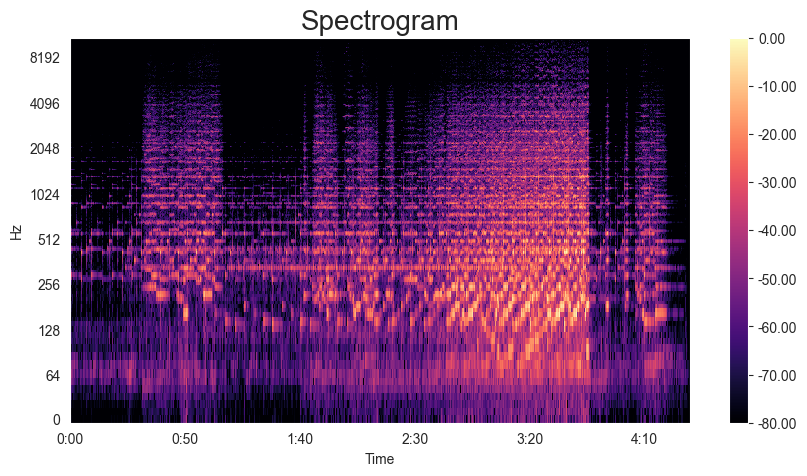

In [6]:
# Plot data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(feature_repr.spectrogram, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectrogram', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')
plt.show()

## Mel Spectrogram

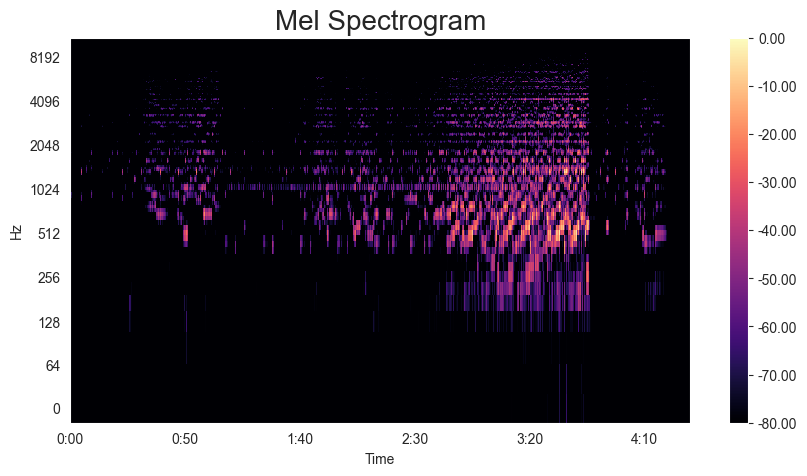

In [7]:
# Plot data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(feature_repr.mel_spectrogram, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Mel Spectrogram', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')
plt.show()

# Timbral Texture Feature Extraction

## Spectral Centroid

In [8]:
# Spectral centroid
feature_vector.spectral.spectral_centroid_mean , feature_vector.spectral.spectral_centroid_var

(1063.6766558323018, 111331.13218861258)

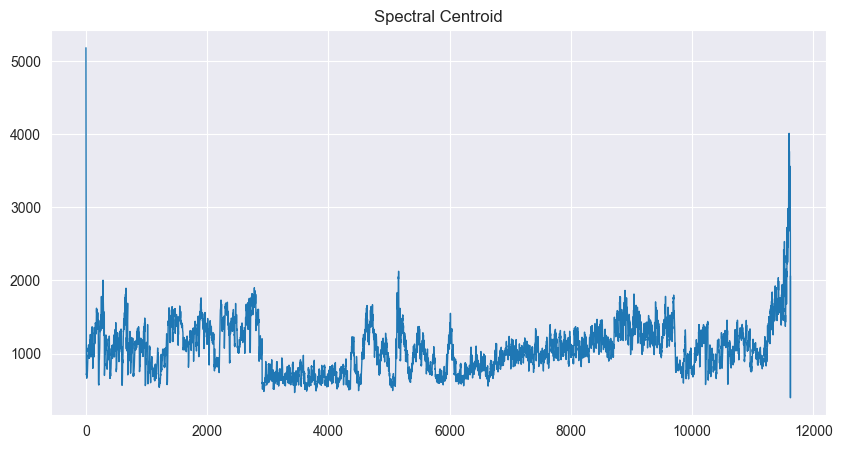

In [9]:
pd.Series(feature_repr.spectral_centroid).plot(figsize=(10,5), lw=1, title='Spectral Centroid')
plt.show()

## Spectral Rolloff

In [10]:
# Spectral rolloff
feature_vector.spectral.spectral_rolloff_mean , feature_vector.spectral.spectral_rolloff_var

(1883.3698228073383, 835752.6234265022)

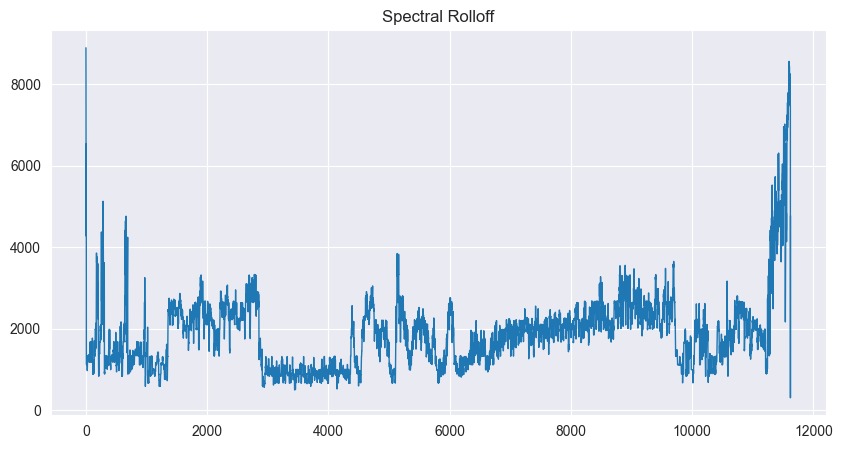

In [11]:
pd.Series(feature_repr.spectral_rolloff).plot(figsize=(10,5), lw=1, title='Spectral Rolloff')
plt.show()

## Spectral Flux

In [12]:
# Spectral flux
# squared distance between normalised magnitudes of successive spectral distributions
feature_vector.spectral.spectral_flux_mean , feature_vector.spectral.spectral_flux_var

(0.68392587, 0.31353983)

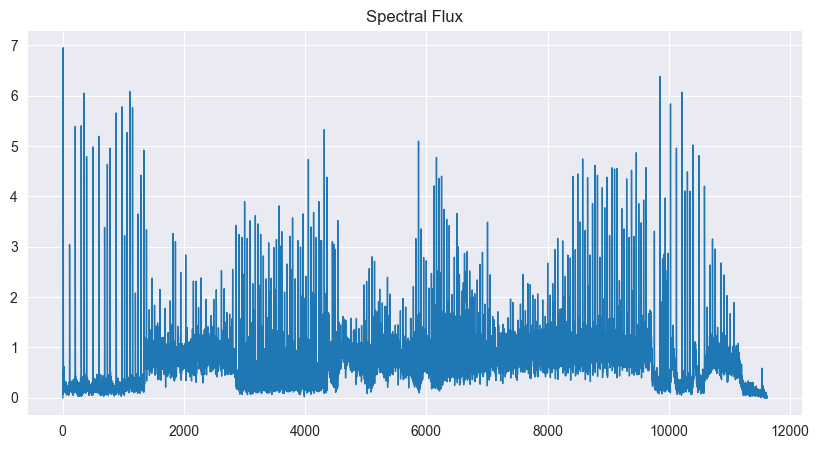

In [13]:
pd.Series(feature_repr.spectral_flux).plot(figsize=(10,5), lw=1, title='Spectral Flux')
plt.show()

## Spectral Flatness

In [14]:
# Spectral flatness
feature_vector.spectral.spectral_flatness_mean, feature_vector.spectral.spectral_flatness_var

(0.0007128069, 0.00026010582)

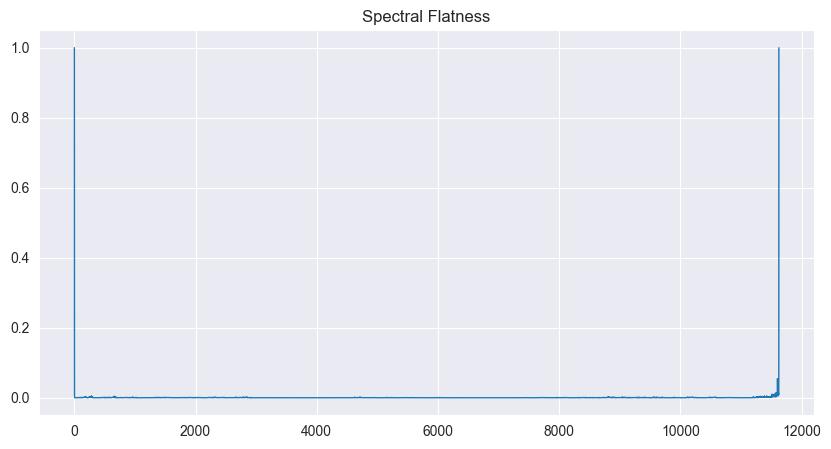

In [15]:
pd.Series(feature_repr.spectral_flatness).plot(figsize=(10,5), lw=1, title='Spectral Flatness')
plt.show()

## Time Domain Zero Crossings

In [16]:
feature_vector.temporal.zero_crossings_mean, feature_vector.temporal.zero_crossings_var

(0.054561429981472585, 0.05158448033984944)

In [17]:
feature_repr.zero_crossings
# might not be exactly the same as Tzanetakis' implementation

array([ True, False, False, ..., False, False, False])

## MFCC Extraction

13 MFCC coefficients, and using only the first 5 excluding DC component

In [18]:
cepstral_coefficients_df = pd.DataFrame(feature_repr.mfccs).transpose()

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >], dtype=object)

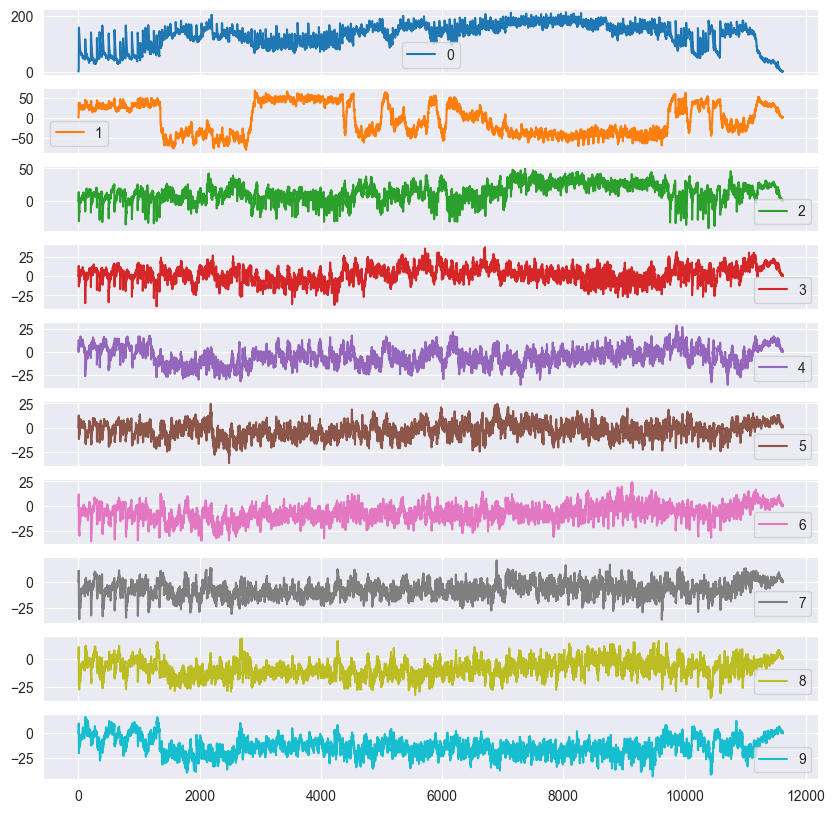

In [19]:
cepstral_coefficients_df.plot(subplots=True, figsize=(10,10))

In [20]:
cepstral_coefficients_df.mean()

0    128.879745
1     -4.501543
2     13.323286
3      3.019207
4     -4.467945
5     -2.364721
6     -6.383873
7     -6.761778
8     -8.293118
9    -13.730529
dtype: float32

In [21]:
cepstral_coefficients_df.var()

0    1811.712769
1    1411.862671
2     170.054520
3      94.563217
4      93.853180
5      58.410088
6      63.526756
7      53.863430
8      57.898735
9      78.042488
dtype: float32

# Rhythmic Features

Timbral features: DWCH and OSC

Possible to use librosa.effects.hpss to get harmonic, percussive

Chroma Energy Normalized seems like chroma cqt

Can also try computing difference between representations for better temporal accuracy?!

# Chord Trajectory

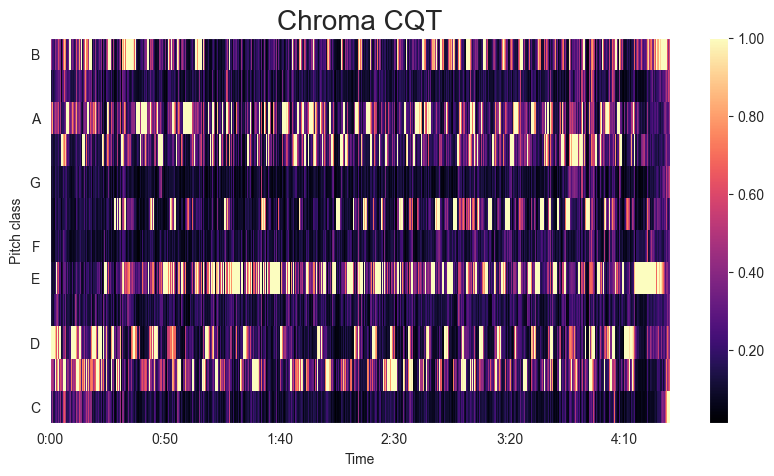

In [22]:
# CQT used for harmonic content over STFT for rhythmic content
# Plot data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(feature_repr.chroma_cqt, x_axis='time', y_axis='chroma', ax=ax)
ax.set_title('Chroma CQT', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')
plt.show()

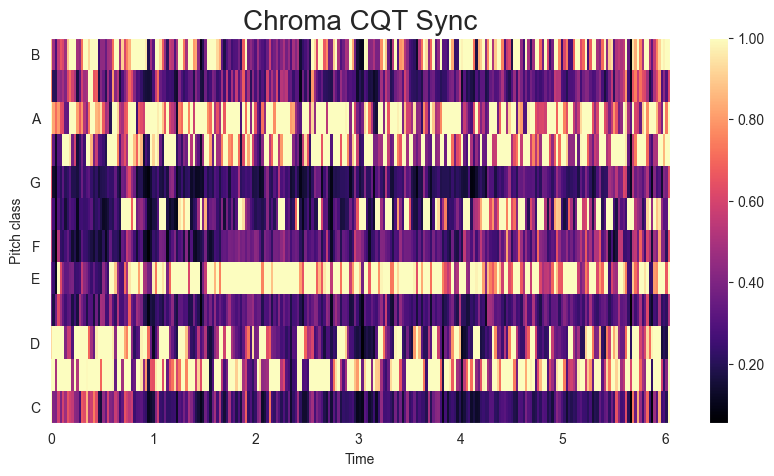

In [23]:
# Plot data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(feature_repr.chroma_cqt_sync, x_axis='time', y_axis='chroma', ax=ax)
ax.set_title('Chroma CQT Sync', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')
plt.show()

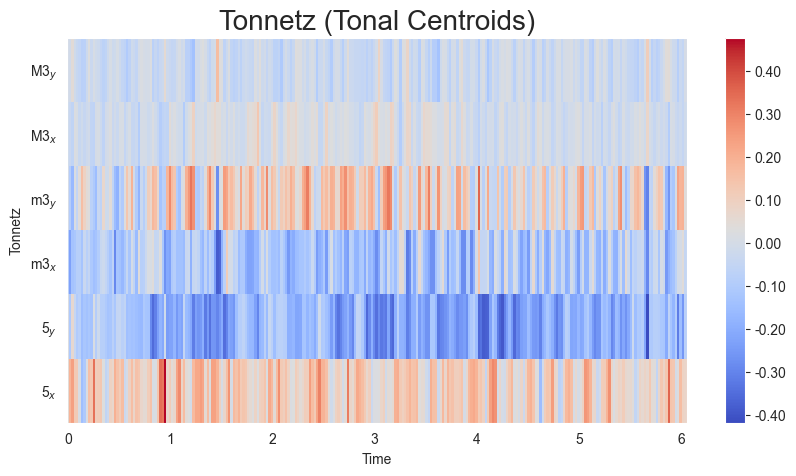

In [24]:
# Plot data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(feature_repr.tonnetz, x_axis='time', y_axis='tonnetz', ax=ax)
ax.set_title('Tonnetz (Tonal Centroids)', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')
plt.show()

<AxesSubplot: >

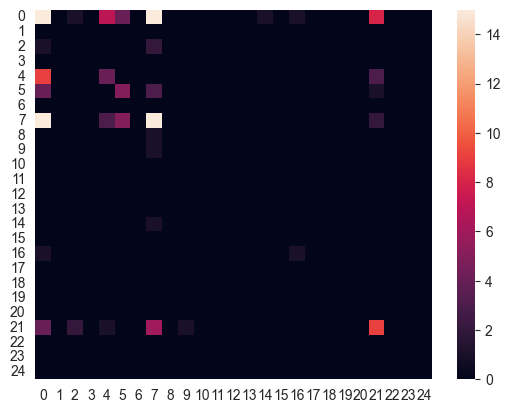

In [25]:
sns.heatmap(feature_repr.chord_trajectory, vmin=0, vmax=15)

In [26]:
# Most likely key signature
feature_vector.harmonic.key_signature

0

<AxesSubplot: >

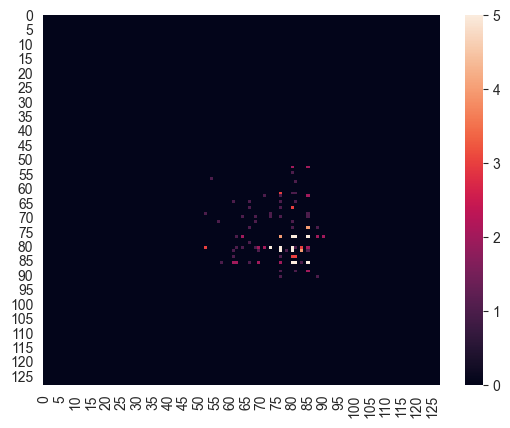

In [27]:
sns.heatmap(feature_repr.note_trajectory, vmin=0, vmax=5)